In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
zone1 = np.array((99.94,100.28,100.48,102.66,97.91,101.93,99.56,101.83,101.15,98.81))
zone2 = np.array((104.84,104.12,100.94,103.41,105.68,105.67,100.43,105.24,104.32,103.45))
zone3 = np.array((105.55,104.07,106.19,105.49,110.62,106.38,105.65,105.97,105.77,110.14))
zone4 = np.array((104.27,103.15,105.25,102.93,102.8,101.89,101.77,105.21,104.54,103.17))
zone5 = np.array((103.41,100.05,100.58,97.16,100.95,101.11,98.02,100.9,100.7,98.26))
df = pd.DataFrame({
    'zone1': zone1,
    'zone2': zone2,
    'zone3': zone3,
    'zone4': zone4,
    'zone5': zone5
})# Inspect the dataset
df.head()

,zone1,zone2,zone3,zone4,zone5
0,99.94,104.84,105.55,104.27,103.41
1,100.28,104.12,104.07,103.15,100.05
2,100.48,100.94,106.19,105.25,100.58
3,102.66,103.41,105.49,102.93,97.16
4,97.91,105.68,110.62,102.80,100.95


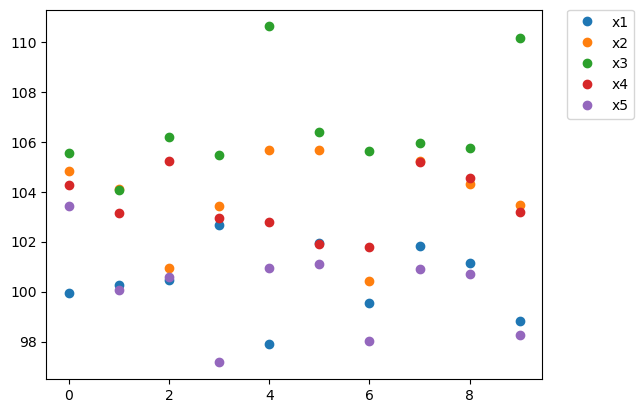

In [3]:
plt.plot(df['zone1'], linestyle='none', marker='o', label = 'x1')
plt.plot(df['zone2'], linestyle='none', marker='o', label = 'x2')
plt.plot(df['zone3'], linestyle='none', marker='o', label = 'x3')
plt.plot(df['zone4'], linestyle='none', marker='o', label = 'x4')
plt.plot(df['zone5'], linestyle='none', marker='o', label = 'x5')

# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [4]:
# Transpose the dataset and stack the columns
data_stack = df.transpose().melt()

# Remove unnecessary columns
data_stack = data_stack.drop('variable', axis=1)

data_stack.head()


,value
0,99.94
1,104.84
2,105.55
3,104.27
4,103.41


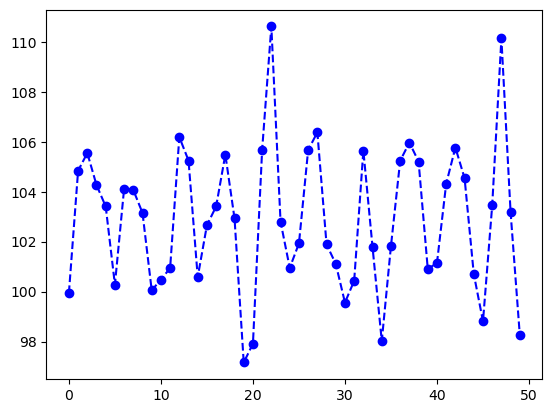

In [5]:
# Plot the data first
plt.plot(data_stack['value'], color='b', linestyle='--', marker='o')
plt.show()

Shapiro-Wilk test p-value = 0.227


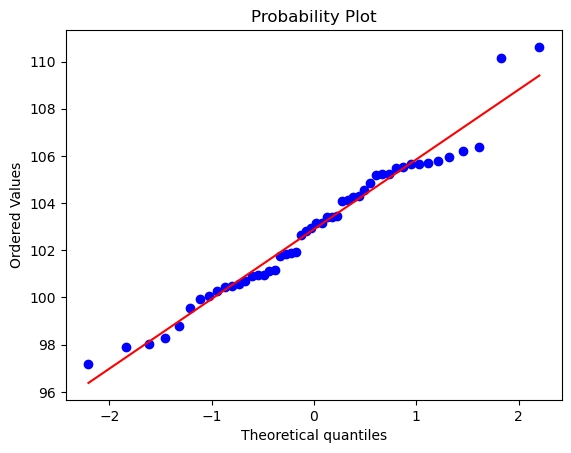

In [6]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_stack['value'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_stack['value'], dist="norm", plot=plt)
plt.show()

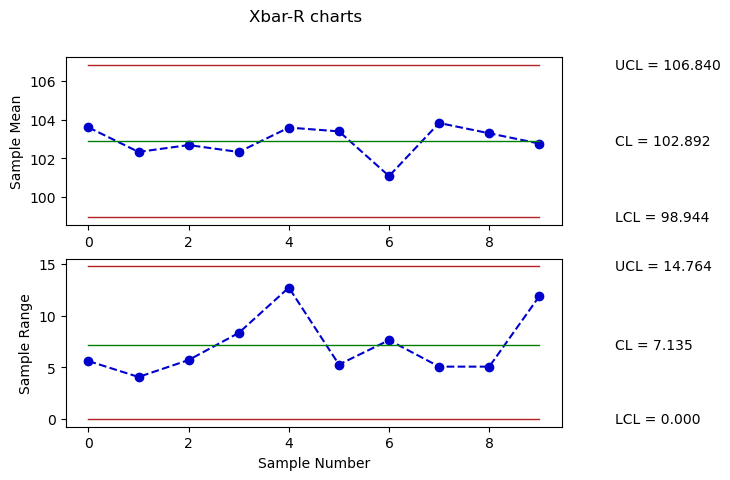

In [7]:
# X-bar and R charts
ARL0=250
alpha=1/ARL0
K_alpha=stats.norm.ppf(1-alpha/2)
data_XR = qda.ControlCharts.XbarR(df,K=K_alpha)

>## Point 2

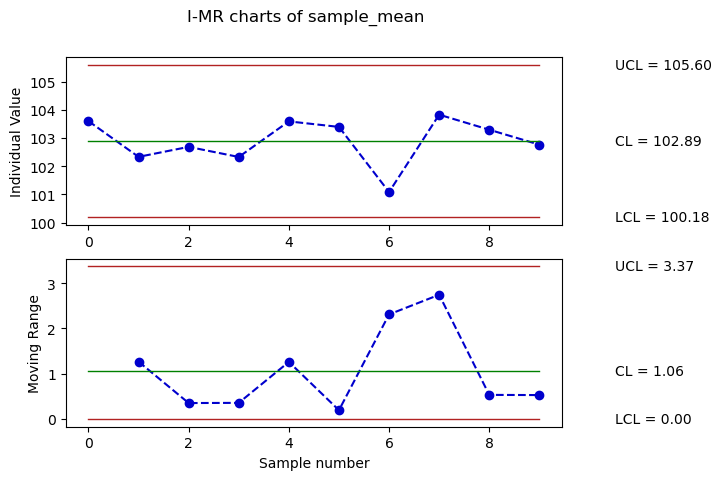

In [9]:
# Create a new dataframe that stores the mean of all the samples
data_Xbar = pd.DataFrame(data_XR['sample_mean'])

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean',K=K_alpha)


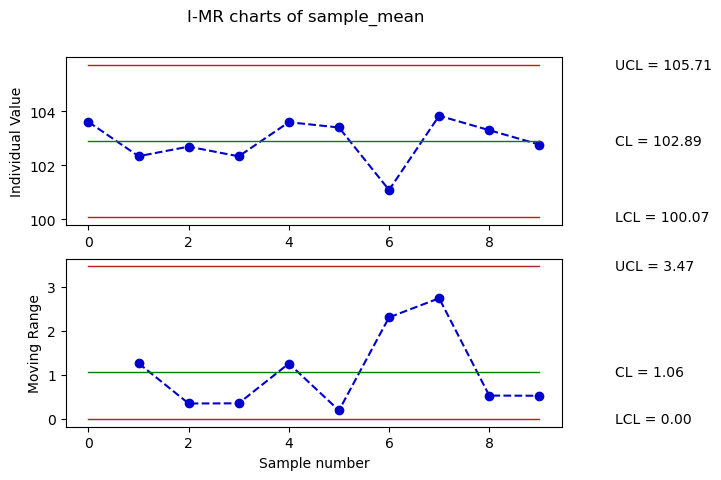

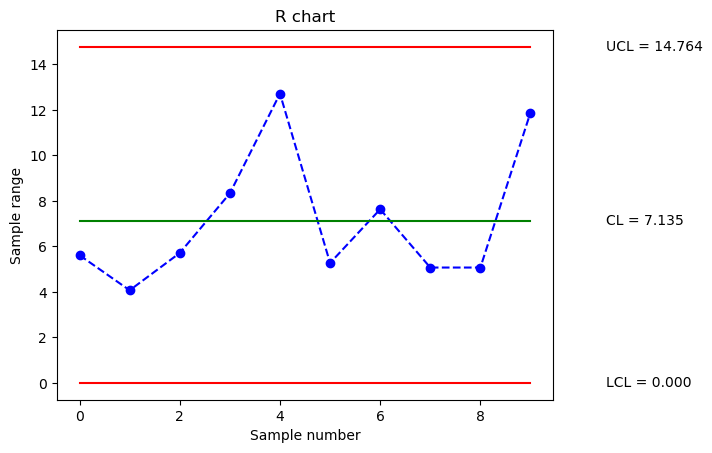

In [10]:
# Design a I-MR-R control chart

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')

# Plot the R chart as well
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()


>## point 3

In [11]:
data_stack['zone1']=np.tile(np.array([1, 0, 0,0,0]), int(len(data_stack)/5))
data_stack['zone2']=np.tile(np.array([0, 1, 0,0,0]), int(len(data_stack)/5))
data_stack['zone3']=np.tile(np.array([0, 0, 1,0,0]), int(len(data_stack)/5))
data_stack['zone4']=np.tile(np.array([0, 0, 0,1,0]), int(len(data_stack)/5))
data_stack['zone5']=np.tile(np.array([0, 0, 0,0,1]), int(len(data_stack)/5))

In [12]:
X = data_stack[['zone1','zone2', 'zone3','zone4','zone5']]
y = data_stack['value']

In [13]:
import qda
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model = stepwise.fit(y, X)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term      Coef      P-Value
const 101.96925 5.016450e-79
zone3   4.61375 6.440348e-07

MODEL SUMMARY
-------------
       S     R-sq  R-sq(adj)
2.277021 0.406268   0.393899

######################################
### Step 2
-------------------
Forward Selection

COEFFICIENTS
------------
 Term       Coef      P-Value
const 102.587667 1.117982e-76
zone3   3.995333 3.414283e-06
zone5  -2.473667 2.076555e-03

MODEL SUMMARY
-------------
       S     R-sq  R-sq(adj)
2.078149 0.515754   0.495148
-------------------
Backward Elimination

No predictor removed.

######################################
### Step 3
-------------------
Forward Selection

COEFFICIENTS
------------
 Term    Coef      P-Value
const 103.654 2.517395e-75
zone3   2.929 5.999892e-05
zone5  -3.540 2.783153e-06
zone1  -3.199 1.573014e-05

MODEL SUMMARY
-------------
       S     R-sq  R-sq

In [14]:
results = model.model_fit
qda.summary(results)

REGRESSION EQUATION
-------------------
value =  + 103.654 const + 2.929 zone3 -3.540 zone5 -3.199 zone1

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const 103.654   0.3827 270.8367 2.5174e-75
zone3   2.929   0.6629   4.4186 5.9999e-05
zone5  -3.540   0.6629  -5.3403 2.7832e-06
zone1  -3.199   0.6629  -4.8259 1.5730e-05

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
1.7116 0.6785     0.6575

ANALYSIS OF VARIANCE
---------------------
    Source   DF      Adj SS      Adj MS    F-Value    P-Value
Regression  3.0    284.4102     94.8034    32.3621 2.1134e-11
     const  1.0 214883.0343 214883.0343 73352.5364 2.5174e-75
     zone3  1.0     57.1936     57.1936    19.5236 5.9999e-05
     zone5  1.0     83.5440     83.5440    28.5186 2.7832e-06
     zone1  1.0     68.2240     68.2240    23.2890 1.5730e-05
     Error 46.0    134.7550      2.9295        NaN        NaN
     Total 49.0    419.1652         NaN        NaN        NaN


Shapiro-Wilk test p-value = 0.742


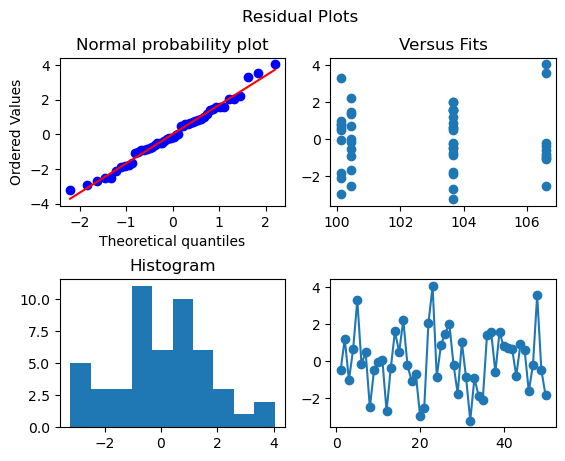

In [15]:
#Check on residuals
residuals = results.resid
fits = results.fittedvalues
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

Runs test p-value on the residuals = 0.809


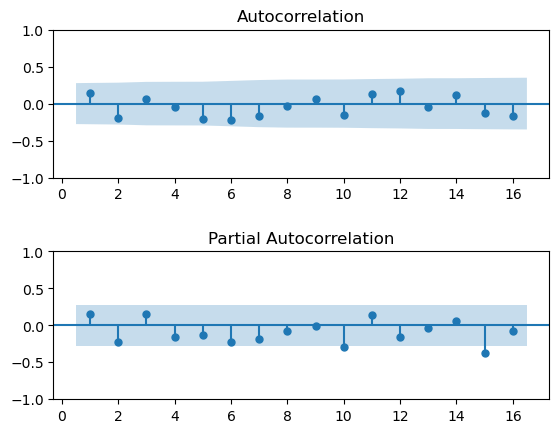

In [16]:
#RANDOMNESS OF FESIDUALS
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs_res = runstest_1samp(residuals, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))

import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data_stack)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data_stack)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

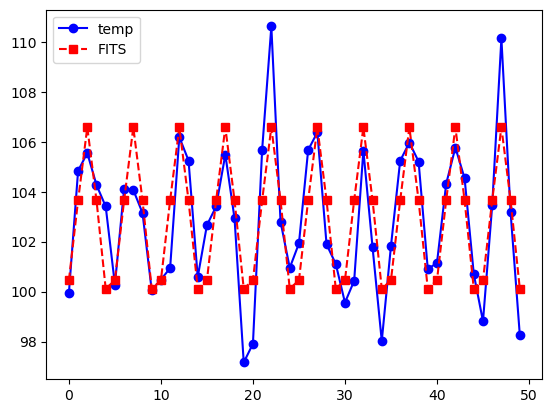

In [17]:
plt.plot(data_stack['value'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(results.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

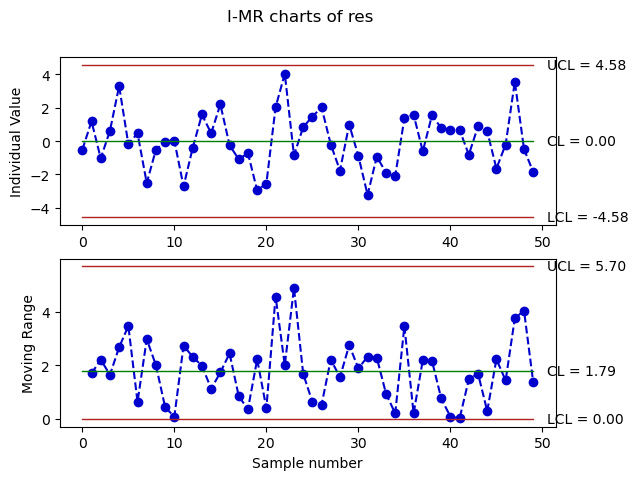

In [19]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(results.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res',K=K_alpha)